# Aplicación del aprendizaje automático en la medicina predictiva.

## Práctica 1: Clasificación para el diagnóstico de enfermedades.

### Agenda
1. Objetivos
2. Problema
3. Datos
4. Desarrollo de la práctica




#### 1. Objetivos.
- Conocer un contexto de aplicación real.

- Ejercitarnos en el análisis de datos y la implementación de algoritmos de clasificación, para adquirir criterio en la aplicación de los mismos.

- Evaluar las capacidades de R y mlr para la implementación.



#### 2. Problema. 
- Resolver un problema de clasificación para el diagnóstico de pacientes hepáticos.



#### 3. Datos.
- Usaremos el conjunto de datos “Indian Liver Patient Dataset”: Los pacientes con enfermedades del hígado han ido aumentando continuamente debido al consumo excesivo de alcohol, inhalación de gases nocivos, ingesta de alimentos contaminados, encurtidos y drogas. 

- Este conjunto de datos se utilizó para evaluar los algoritmos de predicción en un esfuerzo por reducir la cargapara los médicos. Este conjunto de datos contiene 416 registros de pacientes hepáticos y 167 registros de pacientes no hepáticos recopilados en el noreste de Andhra Pradesh, India.

- La variable de respuesta es “diseased” (personas que tienen enfermedad del hígado)

- El data set encuentra en la librería “mlr3data”. 
data("ilpd", package = "mlr3data")



#### 4. Desarrollo de la práctica.


Vamos a desarrollar esta practica en los lenguajes de programacion `R` y `Python` simultaneamente. 

Lo haremos usando el lenguaje `Python` utilizando un paquete llamado `rpy2` que permite ejecutar codigo `R` desde `Python` 


Empezamos la práctica cargando los datos, tanto en `R` como en `Python` :

In [62]:
import rpy2

%load_ext rpy2.ipython

import rpy2.robjects as robjects

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [63]:
%%R

# install.packages("mlr3data")
# install.packages("mlr3")

NULL


Cargamos los datos en `R`

In [64]:
%%R

data("ilpd", package = "mlr3data")

head(ilpd,5)

  age gender total_bilirubin direct_bilirubin alkaline_phosphatase
1  65 Female             0.7              0.1                  187
2  62   Male            10.9              5.5                  699
3  62   Male             7.3              4.1                  490
4  58   Male             1.0              0.4                  182
5  72   Male             3.9              2.0                  195
  alanine_transaminase aspartate_transaminase total_protein albumin
1                   16                     18           6.8     3.3
2                   64                    100           7.5     3.2
3                   60                     68           7.0     3.3
4                   14                     20           6.8     3.4
5                   27                     59           7.3     2.4
  albumin_globulin_ratio diseased
1                   0.90      yes
2                   0.74      yes
3                   0.89      yes
4                   1.00      yes
5                   

Cargamos los datos en `Python`

In [65]:
import pandas as pd

In [66]:
Data_Python = pd.read_csv('indian_liver_patient.csv')

In [67]:
Data_Python = Data_Python.rename({'Dataset': 'Diseased'}, axis=1)

In [68]:
Data_Python.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diseased
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Describiremos cada una de las variables:

- age: edad del paciente. A los pacientes que exceden 89 son listados con la edad 90
- gender: género del paciente.
- total_bilirubin: Total de bilirubina.
- direct_bilirubin: Bilirubina directa.
- alkaline_phosphatase: Fosfatasa alcalina.
- alanine_transaminase: alanina aminotransferasa o transamisana glutámico pirúvica.
- aspartate_trasaminase: aspartato aminotransferasa.
- total_protein: proteinas totales.
- albumin: albúmina.
- albumin_globulin_ratio: albúmina y globulina ratio.
- diseased: Si tienen (1) o no (2) enfermadad en el hígado.



Ahora que los tenenmos cargados y hemos visto la apariencia de los mismo procedemos a hacer el EDA.


#### 4.1. EDA.

Haremmos el EDA con la librería skimr, como se pide en el enunciado de la práctica.


In [69]:
%%R

# install.packages('skimr')

NULL


In [70]:
%%R

library(skimr) # Cargamos librería

skim(ilpd) # EDA con librería

-- Data Summary ------------------------
                           Values
Name                       ilpd  
Number of rows             583   
Number of columns          11    
_______________________          
Column type frequency:           
  factor                   2     
  numeric                  9     
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
  skim_variable n_missing complete_rate ordered n_unique top_counts        
1 gender                0             1 FALSE          2 Mal: 441, Fem: 142
2 diseased              0             1 FALSE          2 yes: 416, no: 167 

-- Variable type: numeric ------------------------------------------------------
  skim_variable          n_missing complete_rate    mean      sd   p0   p25
1 age                            0             1  44.7    16.2    4    33  
2 total_bilirubin                0             1   3.30    6.21   0.4   0.8


También haremos uso de la función str que nos da la estructura de nuestro dataset.


In [71]:
%%R

str(ilpd) # Analizamos la estructura de los datos

'data.frame':	583 obs. of  11 variables:
 $ age                   : int  65 62 62 58 72 46 26 29 17 55 ...
 $ gender                : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 2 1 1 2 2 ...
 $ total_bilirubin       : num  0.7 10.9 7.3 1 3.9 1.8 0.9 0.9 0.9 0.7 ...
 $ direct_bilirubin      : num  0.1 5.5 4.1 0.4 2 0.7 0.2 0.3 0.3 0.2 ...
 $ alkaline_phosphatase  : int  187 699 490 182 195 208 154 202 202 290 ...
 $ alanine_transaminase  : int  16 64 60 14 27 19 16 14 22 53 ...
 $ aspartate_transaminase: int  18 100 68 20 59 14 12 11 19 58 ...
 $ total_protein         : num  6.8 7.5 7 6.8 7.3 7.6 7 6.7 7.4 6.8 ...
 $ albumin               : num  3.3 3.2 3.3 3.4 2.4 4.4 3.5 3.6 4.1 3.4 ...
 $ albumin_globulin_ratio: num  0.9 0.74 0.89 1 0.4 1.3 1 1.1 1.2 1 ...
 $ diseased              : Factor w/ 2 levels "yes","no": 1 1 1 1 1 1 1 1 2 1 ...



Claramente podemos ver como con skimr, las variables que son numéricas las considera todas numéricas, mientras que la función str nos especifica las variables numéricas en si son variables que toman valores reales o enteros.

Por último sacaremos un reporte con la librería "DataExplorer"


In [72]:
%%R

# install.packages('DataExplorer')

NULL


In [73]:
%%R

# DataExplorer::create_report(ilpd,y="diseased") # Reporte EDA en html, no se pide como tal.

NULL


Se genera un reporte en HTML que puede ser abierto en el navegador. 

Aqui esta la version en PDF de dicho reporte:

https://github.com/FabioScielzoOrtiz/Estadistica4all.github.io/blob/main/Notebooks/Aprendizaje%20Automatico/Data%20Profiling%20Report.pdf


Aunque hemos visto el número de valores ausentes en la salida que nos da skimr, esto se puede hacer a mano como sigue:


In [74]:
%%R

library(tidyverse)

In [75]:
%%R 

ilpd %>% map_dbl(.f = function(x){sum(is.na(x))}) # Número de missing values

                   age                 gender        total_bilirubin 
                     0                      0                      0 
      direct_bilirubin   alkaline_phosphatase   alanine_transaminase 
                     0                      0                      0 
aspartate_transaminase          total_protein                albumin 
                     0                      0                      0 
albumin_globulin_ratio               diseased 
                     0                      0 



Podemos sacar las siguientes conclusiones del EDA anterior:
- Se dispone de 583 instancias y 11 variables (2 de tipo factor biclase, 5 de tipo numérico y 4 enteras)
- No hay ausencia de valores por lo que no habrá que eliminar instancias o al menos los modelos no se verán dificultados por los mismos.
- La variable respuesta es diseased que es una de las variables tipo factor biclase que puede tomar valores "yes" o "no". Se puede ver como esta variable está un poco desbalanceada ya que tenemos muchas más observaciones con valor "yes"(416 observaciones) que con valor "no"(167 observaciones).
- En cuanto a las correlaciones se puede ver que son relativamente altas entre los pares que tienen que ver con sustancias similares, como bilirubina directa y bilirubina total. Con respecto a la variable respuesta podemos ver como hay relaciones directas con el resto de variables y una correlacion similar en torno a 0.7.




Ahora vamos a realizar un EDA del data-set pero usando `Python`

El EDA (Exploratory Data Analysis) en lineas generales va a consistir en:

- Analizar estructura del data-set que tenemoss (dimensiones, tipo de variables, valores faltantes etc)
- Calculo de estadisticos básicos para cada variable
-  Calculo de graficos que aporten informacion relevante (histogramas, diagramas de barras, scatter plots, box plots)
- Analisis de relaciones entre los predictores y la respuesta.


### Estructura del data-set:

In [76]:
Data_Python.shape

(583, 11)

Tenemos un data-set con 11 variables y 583 observaciones

Las variables son:

- 10 predictores (age , gender , Total_Bilirubin , Direct_Bilirubin , Alkaline_Phosphotase , Alamine_Aminotransferase , Aspartate_Aminotransferase ,Total_Protiens , Albumin , Albumin_and_Globulin_Ratio ) 
- 1 respuesta ( Diseased )

La variables **categoricas** del data-set son: 

- Diseased y Gender (*binarias*)

Las variables **cuantitativas** del data-set son: 

- age , Alkaline_Phosphotase, Alamine_Aminotransferase  , Aspartate_Aminotransferase (*discretas*) y   Total_Bilirubin , Direct_Bilirubin, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio (*continuas*)

Con el siguiente codigo podemos ver el tipo de cada una de las variables en Python (que podria no coincidir con el descrito anteriormente, en su caso habria que modificarlo.)

In [77]:
Data_Python.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Diseased                    583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


En este caso el tipo en Python es correcto para todas las variables salvo para la respuesta (Diseased) ya que Python la considera entera (cuantitativa discreta: int64) cuando realmente es categorica binaria, por ello tranformamos su tipo de int64 a object (el tipo clasico de las variables categoricas en Python).

In [78]:
Data_Python['Diseased'] = Data_Python['Diseased'].astype('object')

Comprobamos que los cambios se han producido correctamente:

In [79]:
Data_Python.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Diseased                    583 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


Ahora vamos a ver si existe algun valor nulo en el data-set:

In [80]:
Data_Python.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Diseased                      0
dtype: int64

Ninguna de las variables tiene valores faltantes (nulos).

Ahora vamos a ver cual es el rango de las variables categoricas, y posteriormete lo codificaremos en formato estandar $\lbrace 0,1,2,...\rbrace$ , si es que no lo están ya.

In [85]:
Data_Python['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [86]:
Data_Python['Diseased'].unique()

array([1, 2], dtype=object)

Vamos a codificar en formato estandar la variable **Gender** tal que: **Female=0** , **Male=1** , y la variable **Diseased** tal que: **1=0** , **2=1**

Para ello vamos a apoyarnos en la libreria `sklearn`, que posteriormente volverá a ser usada. Podria hacer esto de otras formas, como con un bucle for, pero en casos en los que el numero de categorias es alto, la opcion aportada por `sklearn` es bastante mas eficiente que un bucle.

In [87]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

In [88]:
Data_Python['Gender'] = ord_enc.fit_transform(Data_Python[['Gender']])

Data_Python['Diseased'] = ord_enc.fit_transform(Data_Python[['Diseased']])

Comprobamos que los cambios se han realizado correctamente:

In [89]:
Data_Python['Gender'].unique()

array([0., 1.])

In [90]:
Data_Python['Diseased'].unique()

array([0., 1.])

Pero cuidado, tras realizar estos cambios tambien se cambia en Python el tipo de las variables codificadas a 'float64' , que es un tipo cuantitativo (continuo), por lo que debemos volver a fijar su tipo como 'object' (ya que son categoricas).

In [96]:
Data_Python.dtypes

Age                             int64
Gender                        float64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Diseased                      float64
dtype: object

In [97]:
Data_Python['Diseased'] = Data_Python['Diseased'].astype('object')
Data_Python['Gender'] = Data_Python['Gender'].astype('object')

Verificamos que se han realizado correctamente los cambios:

In [98]:
Data_Python.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Diseased                       object
dtype: object

#### Resumen de estadisticos descriptivos básico:

Ahora vamos a hacer una descripcion estadistica básica de las variables del data-set:

In [99]:
Data_Python.describe(include='all') # include='all' para dar un tratamiento diferente a las categoricas que a las cuantitativas

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diseased
count,583.000000,583.0,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.0
unique,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,441.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416.0
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,NaN
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,NaN
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,NaN
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,NaN
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,NaN
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,NaN


### Análisis gráfico

#### Histogramas para las variables cuantitativas

In [105]:
import numpy as np

In [102]:
from plotnine import ggplot, aes, geom_line, geom_point, geom_histogram, geom_bar, geom_boxplot, scale_y_continuous, scale_x_continuous, labs, after_stat,  geom_vline, scale_color_manual, theme_gray, theme_xkcd, scale_color_identity, geom_hline, facet_wrap, scale_fill_discrete, scale_fill_manual,  scale_fill_hue, guides, guide_legend, ggtitle
from mizani.formatters import percent_format 

In [100]:
Data_Python.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Diseased'],
      dtype='object')

In [174]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [213]:
range(int(Data_Python['Direct_Bilirubin'].min()) , int(Data_Python['Direct_Bilirubin'].max()) , 3)

range(0, 19, 3)

In [216]:
Data_Python['Direct_Bilirubin'].max()

19.7

In [223]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

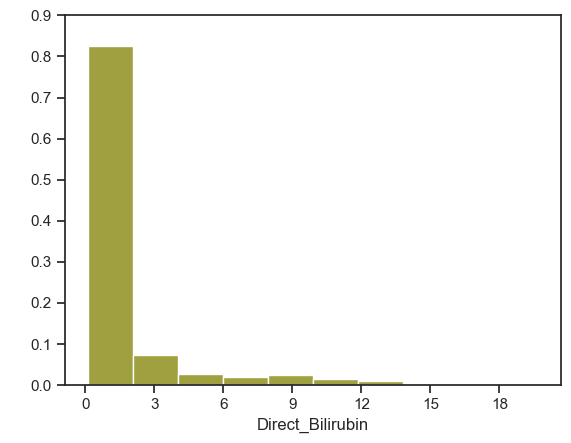

In [224]:
p2 = sns.histplot(data=Data_Python, x="Direct_Bilirubin", stat="proportion", bins=10, color="olive")
p2.axes.set(xlabel='Direct_Bilirubin', ylabel=' ')

p2.set_xticks( range(int(Data_Python['Direct_Bilirubin'].min()) , int(Data_Python['Direct_Bilirubin'].max()) , 3) )
  
p2.set_yticks( np.arange(0, 1, 0.1)  )

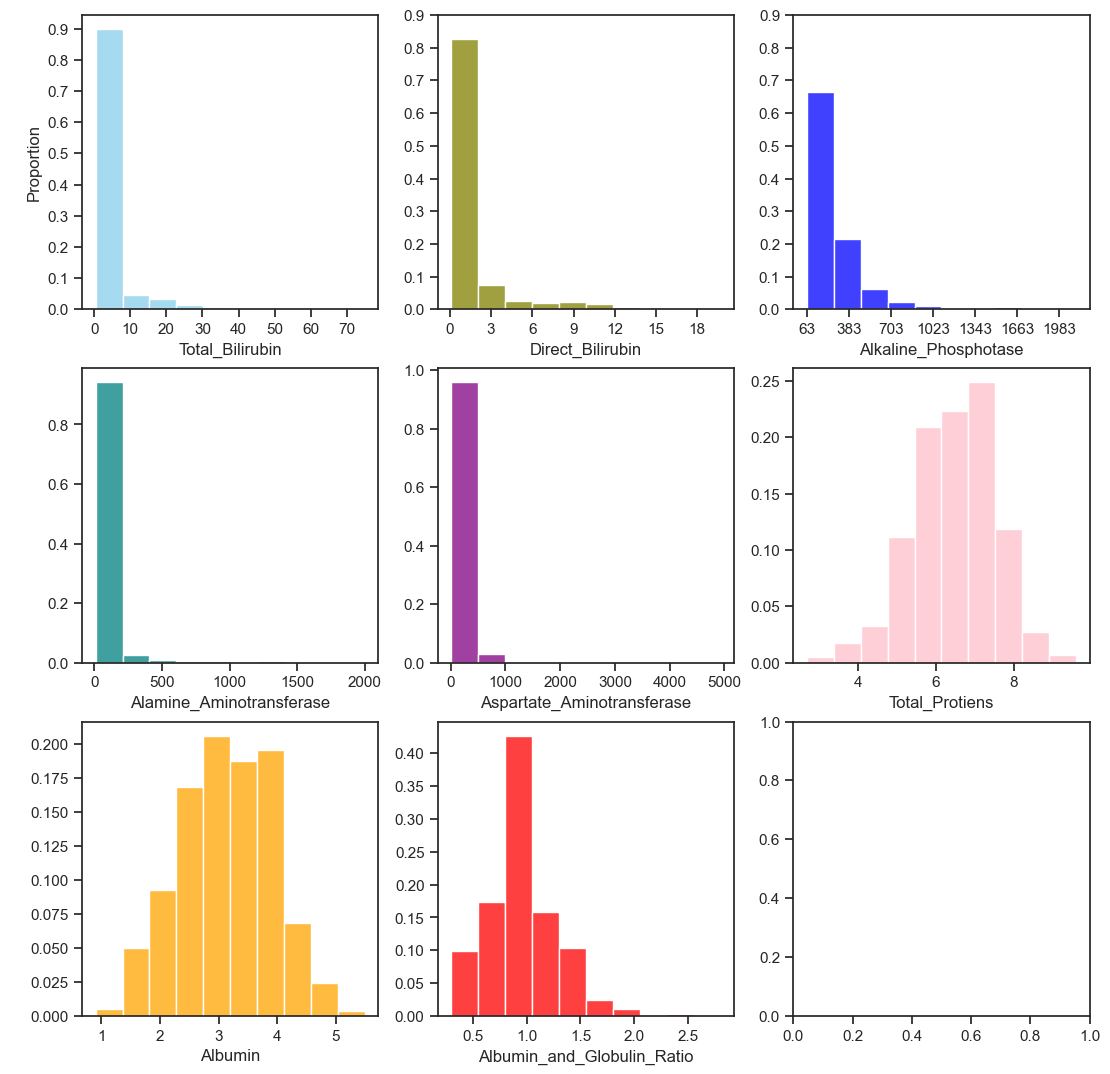

In [234]:
fig, axs = plt.subplots(3, 3, figsize=(13, 13))

p1 = sns.histplot(data=Data_Python, x="Total_Bilirubin", stat="proportion", bins=10, color="skyblue", ax=axs[0, 0])
p1.set_xticks( range(int(Data_Python['Total_Bilirubin'].min()) , int(Data_Python['Total_Bilirubin'].max()) , 10) )
p1.set_yticks( np.arange(0, 1, 0.1)  )

p2 = sns.histplot(data=Data_Python, x="Direct_Bilirubin", stat="proportion", bins=10, color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='Direct_Bilirubin', ylabel=' ')
p2.set_xticks( range(int(Data_Python['Direct_Bilirubin'].min()) , int(Data_Python['Direct_Bilirubin'].max()) , 3) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p3 = sns.histplot(data=Data_Python, x="Alkaline_Phosphotase", stat="proportion", bins=10, color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='Alkaline_Phosphotase', ylabel=' ')
p3.set_xticks( range(int(Data_Python['Alkaline_Phosphotase'].min()) , int(Data_Python['Alkaline_Phosphotase'].max()) , 320) )
p3.set_yticks( np.arange(0, 1, 0.1)  )

p4 = sns.histplot(data=Data_Python, x="Alamine_Aminotransferase", stat="proportion", bins=10, color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='Alamine_Aminotransferase', ylabel=' ')
p2.set_xticks( range(int(Data_Python['Direct_Bilirubin'].min()) , int(Data_Python['Direct_Bilirubin'].max()) , 3) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p5 = sns.histplot(data=Data_Python, x="Aspartate_Aminotransferase", stat="proportion", bins=10, color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='Aspartate_Aminotransferase', ylabel=' ')
p2.set_xticks( range(int(Data_Python['Direct_Bilirubin'].min()) , int(Data_Python['Direct_Bilirubin'].max()) , 3) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p6 = sns.histplot(data=Data_Python, x="Total_Protiens", stat="proportion", bins=10, color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='Total_Protiens', ylabel=' ')
p2.set_xticks( range(int(Data_Python['Direct_Bilirubin'].min()) , int(Data_Python['Direct_Bilirubin'].max()) , 3) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p7 = sns.histplot(data=Data_Python, x="Albumin", stat="proportion", bins=10, color="orange", ax=axs[2, 0])
p7.axes.set(xlabel='Albumin', ylabel=' ')
p2.set_xticks( range(int(Data_Python['Direct_Bilirubin'].min()) , int(Data_Python['Direct_Bilirubin'].max()) , 3) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p8 = sns.histplot(data=Data_Python, x="Albumin_and_Globulin_Ratio", stat="proportion", bins=10, color="red", ax=axs[2, 1])
p8.axes.set(xlabel='Albumin_and_Globulin_Ratio', ylabel=' ')
p2.set_xticks( range(int(Data_Python['Direct_Bilirubin'].min()) , int(Data_Python['Direct_Bilirubin'].max()) , 3) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

#### Diagramas de barras para las variables categoricas

#### Box-plots para las variables cuantitativas

### Análisis de la relación entre los predictores y la respuesta

#### Diagrama de barras de la respuesta en función de predictores categóricos

##### Tabla de frecuencias relativas condicionadas y conjuntas

enfermedad por generos

genero en funcion de enfermedad

#### Diagrama de punto de la respuesta en función de predictores cuantitativos

medias de los predicrtores cuantis en funcion de los valores de la respuesta

Boxplot de cuantis en funcion de la respuesta

####   Tabla de frecuencias relativas condicionadas y conjuntasen función de predictores cuantitativos categorizados (y tambien de predicotres categoricos)

frecuencias relativas: enfermedad dentro de grupos de edad (cuanti categorizada), enfermedad dentro de grupos de edad y genero 


#### 4.2. Algoritmo rpart con R
```{r}
library(dplyr)
library(rpart)
library(rpart.plot)
library(caret)

# Visualización de un arbol muy grande

set.seed(0)
datos_entreno<-sample_frac(ilpd,0.75) # fraccionamos la muestra en entrenamiento y test
datos_test<-setdiff(ilpd,datos_entreno)

arbol_0<-rpart(diseased~.,data = datos_entreno, method = "class",cp=0.01)
rpart.plot(arbol_0, 
           extra = 104,          # show fitted class, probs, percentages
           box.palette = "GnBu", # color scheme
           branch.lty = 3,       # dotted branch lines
           shadow.col = "gray",  # shadows under the node boxes
           nn = TRUE)

(prediccion1<-predict(arbol_0,newdata=datos_test,type="class")) # Predicciones y matriz de confusión
(matriz_confusion1<-confusionMatrix(prediccion1,datos_test[["diseased"]]))


# Debido a la alta complejidad de estos arboles le vamos a hacer un proceso de prepoda, para ello podemos hacer uso tanto del parámetro cp o directamente manipulando los hiperparametros de los modelos.


# Arbol un poco podado (no se pide en la práctica)

set.seed(1)
datos_entreno2<-sample_frac(ilpd,0.75)  # Separamos los datos de entrenamiento
datos_test2<-setdiff(ilpd, datos_entreno2) # Separamos los datos de test

arbol_1<-rpart(diseased~.,data=datos_entreno2,maxdepth=4,method = "class") # Cambiamos la profundidad
rpart.plot(arbol_1, 
           extra = 104,          # show fitted class, probs, percentages
           box.palette = "GnBu", # color scheme
           branch.lty = 3,       # dotted branch lines
           shadow.col = "gray",  # shadows under the node boxes
           nn = TRUE)

# Con esto hemos conseguido un modelo mucho más simple que el anterior sin prepoda.

(prediccion2<-predict(arbol_1,newdata=datos_test2,type="class")) # predicción y matriz de confusión
(matriz_confusion2<-confusionMatrix(prediccion2,datos_test2[["diseased"]]))

```

Se puede ver como hemos mejorado un poco la precisión de la predicción simplemente cambiando el coeficiente de partición. Cabe remarcar que el algoritmo de los CART utilizan Gini como criterio de división.


#### 4.3. Algoritmo C50 con R
```{r}
## Cargado de paquete específico del Arbol de clasificación C5.0
##install.packages("C50",dependencies=TRUE)
library(C50)

# Partición en datos de entrenaminento y test
set.seed(666)
tamano_total<-nrow(ilpd)
tamano_entreno<-round(tamano_total*0.75)
datos_indices<-sample(1:tamano_total,size = tamano_entreno)
datos_entreno<-ilpd[datos_indices,]
datos_test<-ilpd[-datos_indices,]


round(table(datos_entreno$diseased)/nrow(datos_entreno), 3)
## Tienen que ser relativamente similares
round(table(datos_test$diseased)/nrow(datos_test), 3)

## Ejecución del modelo de clasificación C5.0
modeloC50<-C5.0(diseased~.,data=datos_entreno,trials=1,rules=FALSE)
## Información del modelo creado
summary(modeloC50)

## Gráfico del modelo
plot(modeloC50)

## Predicción
(prediccion<-predict(modeloC50, newdata = datos_test,type="class"))

## Matriz de confusión
(matriz_confusion<-table(predicho=prediccion, real=datos_test$diseased))

## Porcentaje de clasificados correctamente
100*sum(diag(matriz_confusion))/sum(matriz_confusion)

## Error de clasificación
error_clas<-round(mean(prediccion != datos_test$diseased),3)
paste(
  "El error de clasificación es del:",100*error_clas,"%.",sum(prediccion==datos_test$diseased),"clasificaciones correctas de un total de",length(prediccion)
)


## Arbol podado (no se pide)
## Seleccionamos la submuestra del 75% de los datos
set.seed(25)
tamano_total<-nrow(ilpd)
tamano_entreno<-round(tamano_total*0.75)
datos_indices<-sample(1:tamano_total,size = tamano_entreno)
datos_entreno<-ilpd[datos_indices,]
datos_test<-ilpd[-datos_indices,]

round(table(datos_entreno$diseased)/nrow(datos_entreno), 3)
## Tienen que ser relativamente similares
round(table(datos_test$diseased)/nrow(datos_test), 3)

## Ejecución del modelo de clasificación C5.0
modeloC50<-C5.0(diseased~.,data=datos_entreno,trials=1,rules=FALSE,control = C5.0Control(minCases = 10,earlyStopping = TRUE
))
## Información del modelo creado
summary(modeloC50)

## Gráfico del modelo
plot(modeloC50)

## Predicción
(prediccion<-predict(modeloC50, newdata = datos_test,type="class"))

## Matriz de confusión
(matriz_confusion<-table(predicho=prediccion, real=datos_test$diseased))

## Porcentaje de clasificados correctamente
100*sum(diag(matriz_confusion))/sum(matriz_confusion)

## Error de clasificación
error_clas<-round(mean(prediccion != datos_test$diseased),3)
paste(
  "El error de clasificación es del:",100*error_clas,"%.",sum(prediccion==datos_test$diseased),"clasificaciones correctas de un total de",length(prediccion)
)

```

#### 4.4. Algoritmo CART con mlr3

```{r}
## No es necesario preprocesar los datos para árboles (dummy y normalización)
library(mlr3)
library(mlr3learners)
library(mlr3extralearners)

# Creamos la tarea de clasificación
ILPD_task<-as_task_classif(ilpd,target = "diseased")

# Método de evaluación
res_desc<-rsmp("holdout",ratio=0.75)
set.seed(0)
res_desc$instantiate(ILPD_task)

# Definimos el método de aprendizaje
tree_learner<-lrn("classif.rpart",maxdepth=4)

# Entrenamos y evaluamos el modelo
tree_resample<-resample(task = ILPD_task, learner = tree_learner,resampling = res_desc,store_models = TRUE)

# Predicciones
tree_test<-tree_resample$predictions()
tree_test[[1]]

# Calculamos la accuracy
tree_acc<-tree_resample$aggregate(msr("classif.acc"))

# Visualizamos el modelo
tree_learner<-tree_resample$learners[[1]]
tree_learner$model

# Ploteamos el arbol
rpart.plot(tree_learner$model)

```

#### 4.5. Algoritmo C5.0 con mlr3
```{r}
library(mlr3)
library(mlr3learners)
library(mlr3extralearners)

# Cambiamos a numericos porque el algoritmo si no no funciona.
ilpd$age<-as.numeric(ilpd$age)
ilpd$alkaline_phosphatase<-as.numeric(ilpd$alkaline_phosphatase)
ilpd$alanine_transaminase<-as.numeric(ilpd$alanine_transaminase)
ilpd$aspartate_transaminase<-as.numeric(ilpd$aspartate_transaminase)

# Creamos la tarea de clasificación
ILPD_task<-as_task_classif(ilpd,target = "diseased")

# Definimos el método de evaluación
res_desc<-rsmp("holdout",ratio=0.75)
set.seed(0)
res_desc$instantiate(ILPD_task)

# Definimos el método de aprendizaje
tree_learner<-lrn("classif.C50")

# Entrenamos y evaluamos el modelo
tree_resample<-resample(task = ILPD_task, learner = tree_learner, resampling = res_desc, store_models = TRUE)

# Predicciones del modelo
tree_test<-tree_resample$predictions()
tree_test[[1]]

# Calculamos la accuracy del modelo
tree_acc<-tree_resample$aggregate(msr("classif.acc"))

# Visualizamos el modelo
tree_learner<-tree_resample$learners[[1]]
tree_learner$model

# No funciona (seguir buscando)
plot(tree_learner$model)
```

